Array: [61, 6, 62, 9, 51, 63, 35, 32, 31, 34, 55, 27, 79, 13, 85, 11, 39, 98, 82, 98, 77, 98, 35, 44, -81, -50, 71, 56, 1, -45, -84, -48, -84, 41, -13, 98, -59, 7, 94, 82, 53, 67, 93, 44, 58, 67]


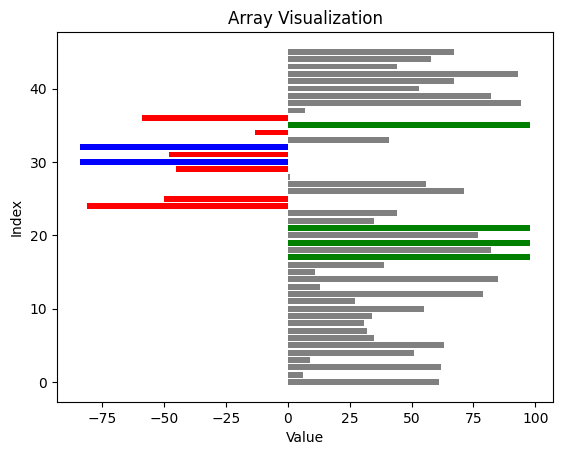

Negative elements count: 8, average: -58.00
Elements between min and max count: 12, sum: 386


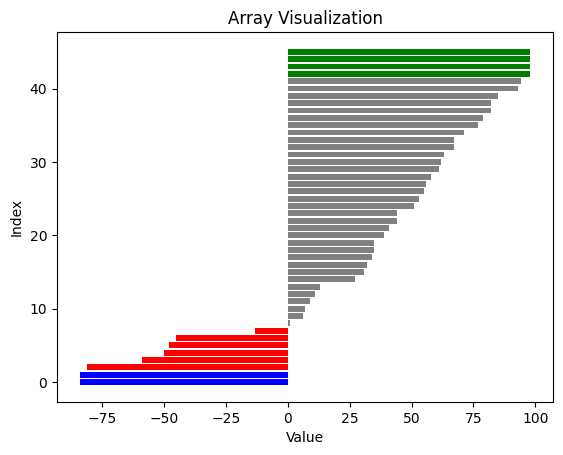

Sorted array: [-84, -84, -81, -59, -50, -48, -45, -13, 1, 6, 7, 9, 11, 13, 27, 31, 32, 34, 35, 35, 39, 41, 44, 44, 51, 53, 55, 56, 58, 61, 62, 63, 67, 67, 71, 77, 79, 82, 82, 85, 93, 94, 98, 98, 98, 98]


In [1]:
import random
import matplotlib.pyplot as plt

# 1. Генерація масиву
def generate_array():
    size = 46
    max_value = 99
    min_value = -99

    # Створюємо масив із випадкових чисел
    array = [random.randint(min_value, max_value) for _ in range(size)]

    # Забезпечуємо, що не більше 20% елементів від'ємні
    negative_limit = int(size * 0.2)
    negative_count = sum(1 for x in array if x < 0)
    while negative_count > negative_limit:
        for i in range(size):
            if array[i] < 0:
                array[i] = random.randint(0, max_value)
                negative_count -= 1
                if negative_count <= negative_limit:
                    break

    # Вставляємо 3-5 максимальних елементів у випадкові місця
    num_max_elements = random.randint(3, 5)
    max_elem = max(array)
    for _ in range(num_max_elements):
        index = random.randint(0, size - 1)
        array[index] = max_elem

    return array

# 2. Збереження масиву у файл
def save_array_to_file(array, filename):
    with open(filename, 'w') as f:
        f.write(','.join(map(str, array)))

# 3. Зчитування масиву із файлу
def read_array_from_file(filename):
    with open(filename, 'r') as f:
        return list(map(int, f.read().split(',')))

# 4. Візуалізація масиву
def visualize_array(array):
    max_value = max(array)
    min_value = min(array)

    colors = []
    for value in array:
        if value == max_value:
            colors.append('green')
        elif value == min_value:
            colors.append('blue')
        elif value < 0:
            colors.append('red')
        else:
            colors.append('gray')

    plt.barh(range(len(array)), array, color=colors)
    plt.xlabel('Value')
    plt.ylabel('Index')
    plt.title('Array Visualization')
    plt.show()

# 5. Кількість та середнє значення від’ємних елементів
def negative_elements_info(array):
    negatives = [x for x in array if x < 0]
    count = len(negatives)
    average = sum(negatives) / count if count > 0 else 0
    return count, average

# 6. Елементи між найближчими мінімальним і максимальним
def elements_between_min_max(array):
    max_index = array.index(max(array))
    min_index = array.index(min(array))

    if max_index > min_index:
        subarray = array[min_index + 1:max_index]
    else:
        subarray = array[max_index + 1:min_index]

    return len(subarray), sum(subarray)

# 7. Сортування масиву та візуалізація
def sort_and_visualize(array):
    sorted_array = sorted(array)
    visualize_array(sorted_array)
    return sorted_array

# Основна програма
if __name__ == "__main__":
    # 1. Генерація масиву
    array = generate_array()

    # 2. Збереження масиву в файл
    filename = 'array.txt'
    save_array_to_file(array, filename)

    # 3. Зчитування масиву з файлу
    array = read_array_from_file(filename)
    print("Array:", array)

    # 4. Візуалізація масиву
    visualize_array(array)

    # 5. Інформація про від’ємні елементи
    neg_count, neg_avg = negative_elements_info(array)
    print(f"Negative elements count: {neg_count}, average: {neg_avg:.2f}")

    # 6. Елементи між мінімумом і максимумом
    between_count, between_sum = elements_between_min_max(array)
    print(f"Elements between min and max count: {between_count}, sum: {between_sum}")

    # 7. Сортування та візуалізація
    sorted_array = sort_and_visualize(array)
    print("Sorted array:", sorted_array)